In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("study_data.csv")

In [2]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,t3_tlx_3,t3_tlx_4,t3_tlx_5,post_0_1,post_0_0,post_1_1,post_1_0,post_2,post_3,post_4
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,How hard did you have to work to accomplish yo...,"How insecure, discouraged, irritated, stressed...",How useful was the provenance summary in answe...,"Overall, which provenance format was most help...",Please explain your choice.,"Overall, which provenance format was most enjo...",Please explain your choice,Assuming a tool that is ready and available to...,Assuming a tool that is ready and available to...,Is there any comments you would like to add be...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID124""}","{""ImportId"":""QID125""}","{""ImportId"":""QID126""}","{""ImportId"":""QID69_1""}","{""ImportId"":""QID159_TEXT""}","{""ImportId"":""QID128_1""}","{""ImportId"":""QID160_TEXT""}","{""ImportId"":""QID66_TEXT""}","{""ImportId"":""QID67_TEXT""}","{""ImportId"":""QID71_TEXT""}"
2,2023-11-19 15:37:38,2023-11-19 16:20:36,IP Address,128.189.31.173,100,2576,True,2023-11-19 16:20:36,R_2PClVj6LY26Lbkb,NaN,...,4,2,2,5,The graph was confusing and overwhelming. The ...,5,I felt there was a more logical flow of inform...,Integrating code executions into text summarie...,If it was confusing and not very helpful or if...,That was fun. Thanks.
3,2023-11-19 16:24:13,2023-11-19 17:07:50,IP Address,128.189.31.173,100,2617,True,2023-11-19 17:07:51,R_3PtxsBtXhKCaoq8,NaN,...,3,2,2,4,The text was slightly more useful for answerin...,3,The graph was visually easier to interpret for...,I would like to use this tool during the devel...,If there was a lack of documentation for the t...,No.
4,2023-11-20 16:19:11,2023-11-20 16:50:23,IP Address,128.189.30.10,100,1871,True,2023-11-20 16:50:23,R_2qw33WYHS47omRA,NaN,...,3,3,2,4,I felt that the text one was a higher level su...,2,The graph provided more indepth analysis if yo...,Highlighting of linked routes (when you hover ...,No.,NaN


In [3]:
# Preprocess
%run process.py study_data.csv study_data_processed.csv

In [4]:
df = pd.read_csv("study_data_processed.csv")

## Study Demographics

['Forestry', 'Forestry', 'Data Science', 'Data Science', 'Environmental Science', 'Bioinformatics', 'Environmental Science', 'Data Science', 'Data Science', 'Forestry', 'Environmental Science', 'Data Science', 'Forestry', 'Environmental Science', 'Bioinformatics', 'Visualization', 'Human Robot Interaction ', 'Physics', ' Computer Science', 'Information Technology']


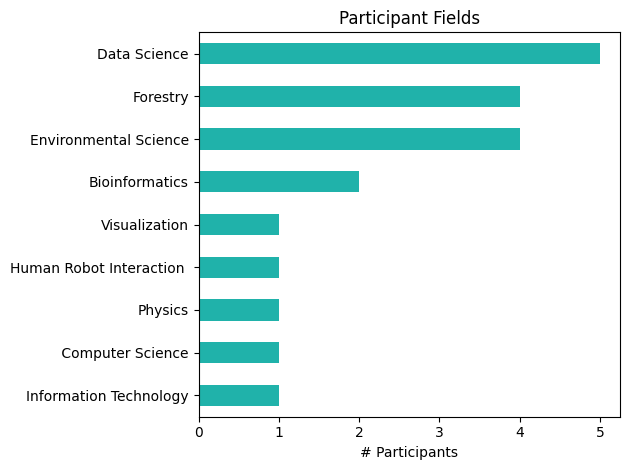

In [5]:
df['demo_vals'] = df['pre_2'].str.split(',')

# Explode the lists into separate rows
demo_vals = df.explode('demo_vals')

# Convert to a list
result_list = demo_vals['demo_vals'].tolist()

df['demo_vals_text'] = df['pre_2_7_TEXT'].str.split(',')

# Explode the lists into separate rows
demo_vals_text = df.explode('demo_vals_text')

# Convert to a list
result_list_text = demo_vals_text['demo_vals_text'].tolist()

result_list.extend(result_list_text)

# Filter out NaN values
result_list = [value for value in result_list if not pd.isna(value)]
result_list = [value for value in result_list if not value == 'Other']
print(result_list)

# Create a DataFrame
demo_df = pd.DataFrame(result_list, columns=['Values'])

# Count occurrences of each unique value
value_counts = demo_df['Values'].value_counts()

# Create a horizontal bar chart
ax = value_counts.plot(kind='barh', color='lightseagreen')

# Reverse the order of the y-axis
ax.invert_yaxis()

# Set labels and title
plt.xlabel('# Participants')
plt.ylabel(None)
plt.title('Participant Fields')

plt.tight_layout()

plt.savefig('fig/fields.png', format='png')

Text(0.5, 1.0, 'Pie Chart of Category Distribution')

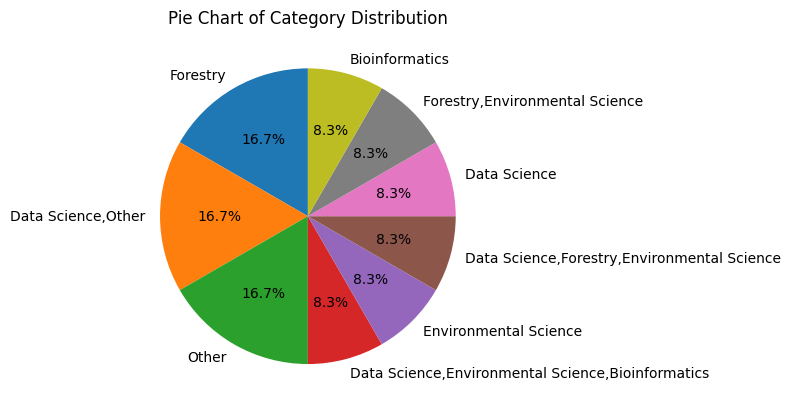

In [6]:
category_counts = df['pre_2'].value_counts()

# Plot a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Pie Chart of Category Distribution')

Text(0.5, 1.0, 'Pie Chart of Category Distribution')

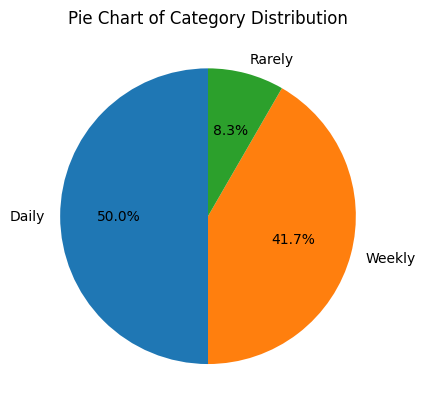

In [7]:
category_counts = df['pre_0'].value_counts()

# Plot a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Pie Chart of Category Distribution')

Text(0.5, 1.0, 'Pie Chart of Category Distribution')

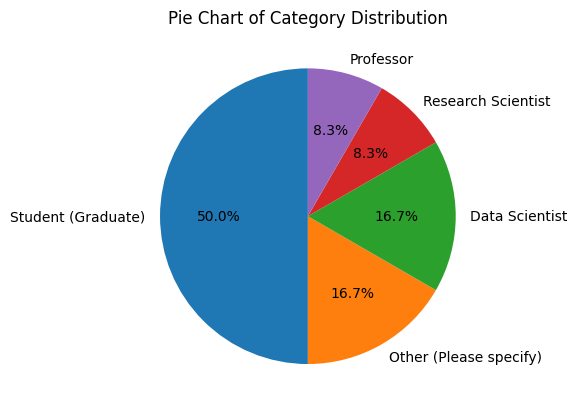

In [8]:
category_counts = df['pre_1'].value_counts()

# Plot a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Pie Chart of Category Distribution')

Text(0.5, 1.0, 'Experience with Python')

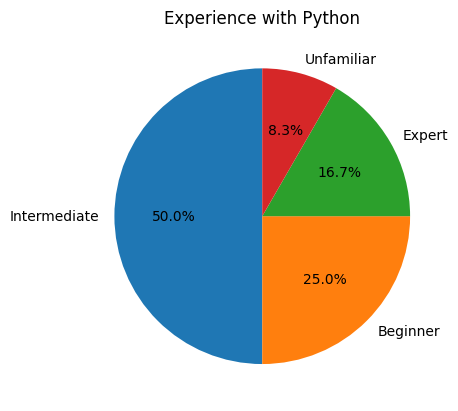

In [9]:
category_counts = df['pre_3_1'].value_counts()

# Plot a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Experience with Python')

Text(0.5, 1.0, 'Experience with R')

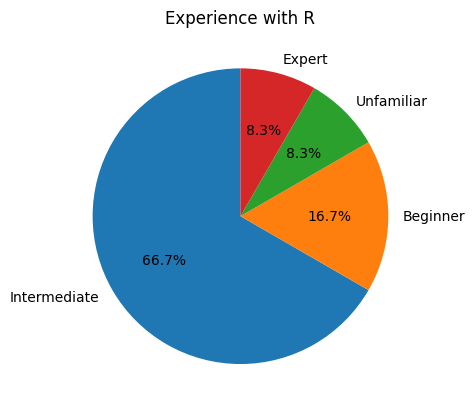

In [10]:
category_counts = df['pre_3_2'].value_counts()

# Plot a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Experience with R')

Text(0.5, 1.0, 'Do you have a background in computer science?')

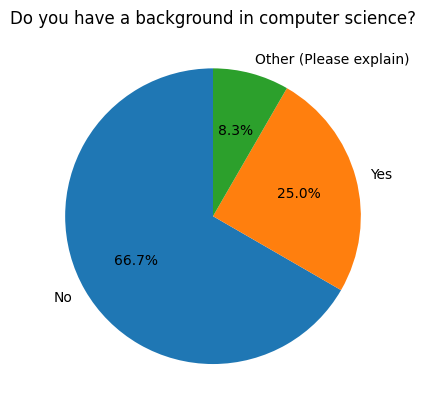

In [11]:
category_counts = df['pre_4'].value_counts()

# Plot a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Do you have a background in computer science?')

## Timing

In [12]:
# Timing data
timing_t0_df = df.filter(['t0_prov_type', 't0_timing_Page Submit'])
timing_t1_df = df.filter(['t1_prov_type', 't1_timing_Page Submit'])
timing_t2_df = df.filter(['t2_prov_type', 't2_timing_Page Submit'])
timing_t3_df = df.filter(['t3_prov_type', 't3_timing_Page Submit'])

# Map 'prov_type' values to colors
color_mapping = {'text': 'blue', 'graph': 'orange'}
timing_t0_df['bar_color'] = timing_t0_df['t0_prov_type'].map(color_mapping)
timing_t1_df['bar_color'] = timing_t1_df['t1_prov_type'].map(color_mapping)
timing_t2_df['bar_color'] = timing_t2_df['t2_prov_type'].map(color_mapping)
timing_t3_df['bar_color'] = timing_t3_df['t3_prov_type'].map(color_mapping)

In [13]:
def get_average_timing(timing_df, task_num, type):
    if (type == 'all'):
        return pd.to_numeric(timing_df[f't{task_num}_timing_Page Submit']).mean()
    if (type == 'graph'):
        return pd.to_numeric(timing_df.loc[df[f't{task_num}_prov_type'] == 'graph', f't{task_num}_timing_Page Submit']).mean()
    if (type == 'text'):
        return pd.to_numeric(timing_df.loc[df[f't{task_num}_prov_type'] == 'text', f't{task_num}_timing_Page Submit']).mean()
    
def get_std_timing(timing_df, task_num, type):
    if (type == 'all'):
        return pd.to_numeric(timing_df[f't{task_num}_timing_Page Submit']).std()
    if (type == 'graph'):
        return pd.to_numeric(timing_df.loc[df[f't{task_num}_prov_type'] == 'graph', f't{task_num}_timing_Page Submit']).std()
    if (type == 'text'):
        return pd.to_numeric(timing_df.loc[df[f't{task_num}_prov_type'] == 'text', f't{task_num}_timing_Page Submit']).std()

def print_averages_timing(average, std, graph_average, graph_std, text_average, text_std):
    print("Average: " + str(taverage) + ", Standard Deviation: " + str(std))
    print("T0 Graph Average: " + str(graph_average) + ", Standard Deviation: " + str(graph_std))
    print("T0 Text Average: " + str(ttext_average) + ", Standard Deviation: " + str(text_std))

In [14]:
t0_avg_timing = get_average_timing(df, 0, 'all')
t0_timing_avg_graph = get_average_timing(df, 0, 'graph')
t0_timing_avg_text = get_average_timing(df, 0, 'text')

t0_std_timing = get_std_timing(df, 0, 'all')
t0_timing_std_graph = get_std_timing(df, 0, 'graph')
t0_timing_std_text = get_std_timing(df, 0, 'text')

t1_avg_timing = get_average_timing(df, 1, 'all')
t1_timing_avg_graph = get_average_timing(df, 1, 'graph')
t1_timing_avg_text = get_average_timing(df, 1, 'text')

t1_timing_std = get_std_timing(df, 1, 'all')
t1_timing_std_graph = get_std_timing(df, 1, 'graph')
t1_timing_std_text = get_std_timing(df, 1, 'text')

t2_avg_timing = get_average_timing(df, 2, 'all')
t2_timing_avg_graph = get_average_timing(df, 2, 'graph')
t2_timing_avg_text = get_average_timing(df, 2, 'text')

t2_timing_std = get_std_timing(df, 2, 'all')
t2_timing_std_graph = get_std_timing(df, 2, 'graph')
t2_timing_std_text = get_std_timing(df, 2, 'text')

t3_avg_timing = get_average_timing(df, 3, 'all')
t3_timing_avg_graph = get_average_timing(df, 3, 'graph')
t3_timing_avg_text = get_average_timing(df, 3, 'text')

t3_timing_std = get_std_timing(df, 3, 'all')
t3_timing_std_graph = get_std_timing(df, 3, 'graph')
t3_timing_std_text = get_std_timing(df, 3, 'text')

timing_text_data = {'task': ['Task 1', 'Task 2', 'Task 3', 'Task 4'], 
                'timing_score_avg_text': [t0_timing_avg_text, t1_timing_avg_text, t2_timing_avg_text, t3_timing_avg_text],
                'timing_score_avg_graph': [t0_timing_avg_graph, t1_timing_avg_graph, t2_timing_avg_graph, t3_timing_avg_graph],
                'timing_score_std_text': [t0_timing_std_text, t1_timing_std_text, t2_timing_std_text, t3_timing_std_text],
                'timing_score_std_graph': [t0_timing_std_graph, t1_timing_std_graph, t2_timing_std_graph, t3_timing_std_graph]}

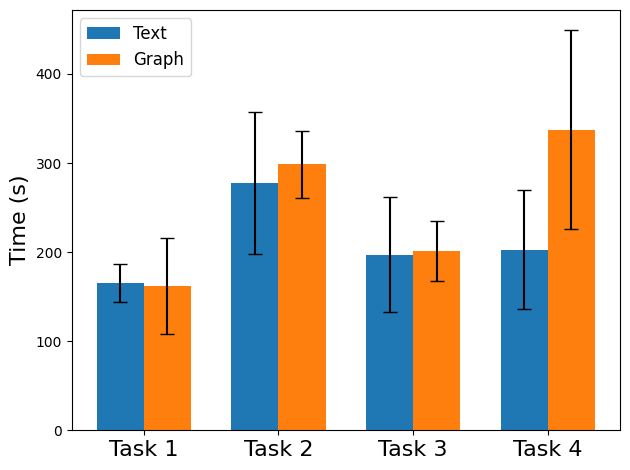

In [15]:
# Create a DataFrame
timing_df = pd.DataFrame(timing_text_data)

# Plot side-by-side bar graph
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(timing_df['task']))

# Bar for text
text_bar = ax.bar([idx - bar_width/2 for idx in index], timing_df['timing_score_avg_text'], bar_width, label='Text', yerr=timing_df['timing_score_std_text'], capsize=5)

# Bar for graph
graph_bar = ax.bar([idx + bar_width/2 for idx in index], timing_df['timing_score_avg_graph'], bar_width, label='Graph', yerr=timing_df['timing_score_std_graph'], capsize=5)

# Add labels and title
ax.set_ylabel('Time (s)', fontsize=16)
#ax.set_title('Average Time to Complete Tasks', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(timing_df['task'], fontsize=16)
ax.legend(fontsize=12)

plt.tight_layout()
plt.savefig('fig/timing_scores.png', format='png')
plt.show()

Average: 163.75424999999998, Standard Deviation: 39.234676121848686
Graph Average: 162.0281666666667, Standard Deviation: 54.155253840847855
Text Average: 165.48033333333333, Standard Deviation: 21.134086009730034


Text(0.5, 1.0, 'Timing values Q0')

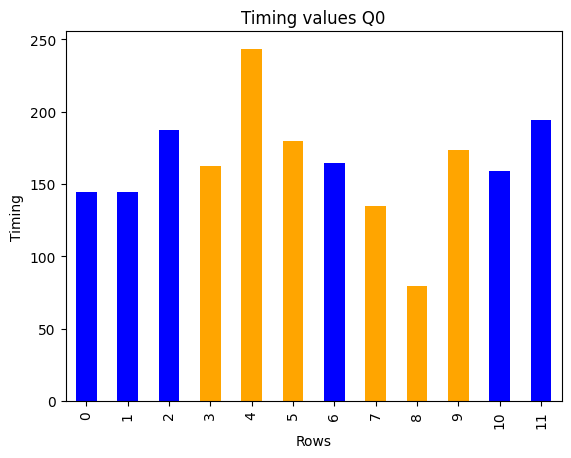

In [16]:
# T0
t0_average = pd.to_numeric(timing_t0_df['t0_timing_Page Submit']).mean()
t0_graph_average = pd.to_numeric(timing_t0_df.loc[timing_t0_df['t0_prov_type'] == 'graph', 't0_timing_Page Submit']).mean()
t0_text_average = pd.to_numeric(timing_t0_df.loc[timing_t0_df['t0_prov_type'] == 'text', 't0_timing_Page Submit']).mean()

t0_std = pd.to_numeric(timing_t0_df['t0_timing_Page Submit']).std()
t0_graph_std = pd.to_numeric(timing_t0_df.loc[timing_t0_df['t0_prov_type'] == 'graph', 't0_timing_Page Submit']).std()
t0_text_std = pd.to_numeric(timing_t0_df.loc[timing_t0_df['t0_prov_type'] == 'text', 't0_timing_Page Submit']).std()

print("Average: " + str(t0_average) + ", Standard Deviation: " + str(t0_std))
print("Graph Average: " + str(t0_graph_average) + ", Standard Deviation: " + str(t0_graph_std))
print("Text Average: " + str(t0_text_average) + ", Standard Deviation: " + str(t0_text_std))

pd.to_numeric(timing_t0_df['t0_timing_Page Submit']).plot(kind='bar', color=timing_t0_df['bar_color'])
# Adding labels and title
plt.xlabel('Rows')
plt.ylabel('Timing')
plt.title('Timing values Q0')

Average: 288.00458333333336
Graph Average: 298.41633333333334
Text Average: 277.5928333333333


Text(0.5, 1.0, 'Timing values Q1')

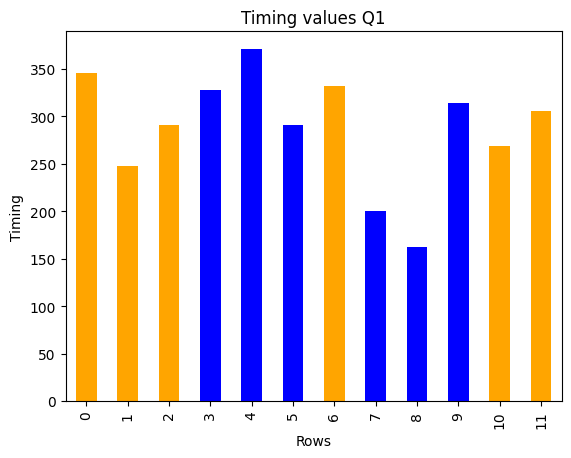

In [17]:
# T1
pd.to_numeric(timing_t1_df['t1_timing_Page Submit']).plot(kind='bar', color=timing_t1_df['bar_color'])

average = pd.to_numeric(timing_t1_df['t1_timing_Page Submit']).mean()
graph_average = pd.to_numeric(timing_t1_df.loc[timing_t1_df['t1_prov_type'] == 'graph', 't1_timing_Page Submit']).mean()
text_average = pd.to_numeric(timing_t1_df.loc[timing_t1_df['t1_prov_type'] == 'text', 't1_timing_Page Submit']).mean()

print("Average: " + str(average))
print("Graph Average: " + str(graph_average))
print("Text Average: " + str(text_average))

# Adding labels and title
plt.xlabel('Rows')
plt.ylabel('Timing')
plt.title('Timing values Q1')

Average: 199.35958333333335
Graph Average: 201.4795
Text Average: 197.2396666666667


Text(0.5, 1.0, 'Timing values Q2')

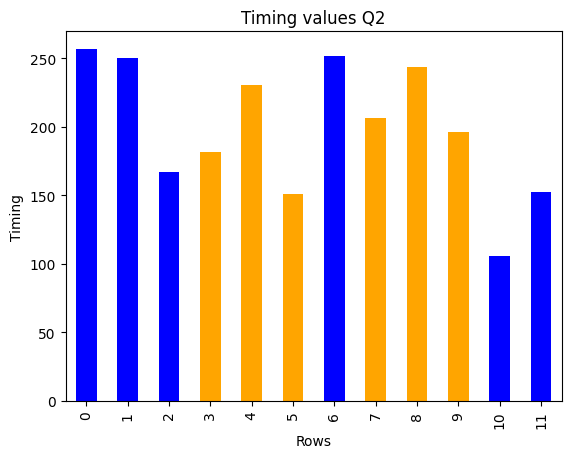

In [18]:
# T2
pd.to_numeric(timing_t2_df['t2_timing_Page Submit']).plot(kind='bar', color=timing_t2_df['bar_color'])

average = pd.to_numeric(timing_t2_df['t2_timing_Page Submit']).mean()
graph_average = pd.to_numeric(timing_t2_df.loc[timing_t2_df['t2_prov_type'] == 'graph', 't2_timing_Page Submit']).mean()
text_average = pd.to_numeric(timing_t2_df.loc[timing_t2_df['t2_prov_type'] == 'text', 't2_timing_Page Submit']).mean()

print("Average: " + str(average))
print("Graph Average: " + str(graph_average))
print("Text Average: " + str(text_average))

# Adding labels and title
plt.xlabel('Rows')
plt.ylabel('Timing')
plt.title('Timing values Q2')

Average: 281.16991666666667
Graph Average: 337.3875714285714
Text Average: 202.46519999999998


Text(0.5, 1.0, 'Timing values Q3')

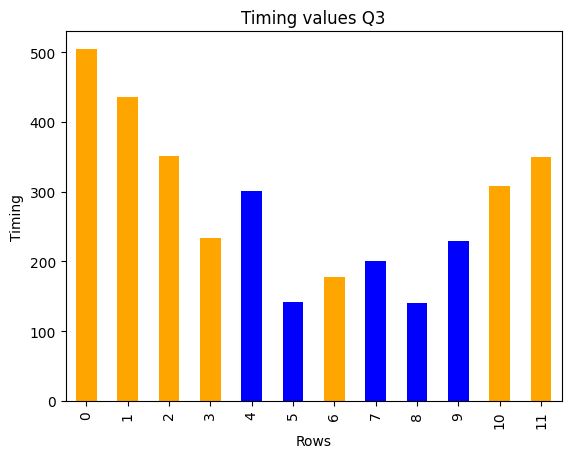

In [19]:
# T3
pd.to_numeric(timing_t3_df['t3_timing_Page Submit']).plot(kind='bar', color=timing_t3_df['bar_color'])

average = pd.to_numeric(timing_t3_df['t3_timing_Page Submit']).mean()
graph_average = pd.to_numeric(timing_t3_df.loc[timing_t3_df['t3_prov_type'] == 'graph', 't3_timing_Page Submit']).mean()
text_average = pd.to_numeric(timing_t3_df.loc[timing_t3_df['t3_prov_type'] == 'text', 't3_timing_Page Submit']).mean()

print("Average: " + str(average))
print("Graph Average: " + str(graph_average))
print("Text Average: " + str(text_average))

# Adding labels and title
plt.xlabel('Rows')
plt.ylabel('Timing')
plt.title('Timing values Q3')

## Correctness

In [20]:
def get_average_score(df, task_num, type):
    if (type == 'all'):
        return pd.to_numeric(df[f't{task_num}_score']).mean()
    if (type == 'graph'):
        return pd.to_numeric(df.loc[df[f't{task_num}_prov_type'] == 'graph', f't{task_num}_score']).mean()
    if (type == 'text'):
        return pd.to_numeric(df.loc[df[f't{task_num}_prov_type'] == 'text', f't{task_num}_score']).mean()
    
def get_std_score(df, task_num, type):
    if (type == 'all'):
        return pd.to_numeric(df[f't{task_num}_score']).std()
    if (type == 'graph'):
        return pd.to_numeric(df.loc[df[f't{task_num}_prov_type'] == 'graph', f't{task_num}_score']).std()
    if (type == 'text'):
        return pd.to_numeric(df.loc[df[f't{task_num}_prov_type'] == 'text', f't{task_num}_score']).std()

def print_averages_score(average, std, graph_average, graph_std, text_average, text_std):
    print("Average: " + str(taverage) + ", Standard Deviation: " + str(std))
    print("T0 Graph Average: " + str(graph_average) + ", Standard Deviation: " + str(graph_std))
    print("T0 Text Average: " + str(text_average) + ", Standard Deviation: " + str(text_std))

In [21]:
t0_avg_score = get_average_score(df, 0, 'all')
t0_score_avg_graph = get_average_score(df, 0, 'graph')
t0_score_avg_text = get_average_score(df, 0, 'text')

t0_std_score = get_std_score(df, 0, 'all')
t0_score_std_graph = get_std_score(df, 0, 'graph')
t0_score_std_text = get_std_score(df, 0, 'text')

t1_avg_score = get_average_score(df, 1, 'all')
t1_score_avg_graph = get_average_score(df, 1, 'graph')
t1_score_avg_text = get_average_score(df, 1, 'text')

t1_score_std = get_std_score(df, 1, 'all')
t1_score_std_graph = get_std_score(df, 1, 'graph')
t1_score_std_text = get_std_score(df, 1, 'text')

t2_avg_score = get_average_score(df, 2, 'all')
t2_score_avg_graph = get_average_score(df, 2, 'graph')
t2_score_avg_text = get_average_score(df, 2, 'text')

t2_score_std = get_std_score(df, 2, 'all')
t2_score_std_graph = get_std_score(df, 2, 'graph')
t2_score_std_text = get_std_score(df, 2, 'text')

t3_avg_score = get_average_score(df, 3, 'all')
t3_score_avg_graph = get_average_score(df, 3, 'graph')
t3_score_avg_text = get_average_score(df, 3, 'text')

t3_score_std = get_std_score(df, 3, 'all')
t3_score_std_graph = get_std_score(df, 3, 'graph')
t3_score_std_text = get_std_score(df, 3, 'text')

score_text_data = {'task': ['Task 0', 'Task 1', 'Task 2', 'Task 3'], 
                'score_avg_text': [t0_score_avg_text, t1_score_avg_text, t2_score_avg_text, t3_score_avg_text],
                'score_avg_graph': [t0_score_avg_graph, t1_score_avg_graph, t2_score_avg_graph, t3_score_avg_graph],
                'score_std_text': [t0_score_std_text, t1_score_std_text, t2_score_std_text, t3_score_std_text],
                'score_std_graph': [t0_score_std_graph, t1_score_std_graph, t2_score_std_graph, t3_score_std_graph]}

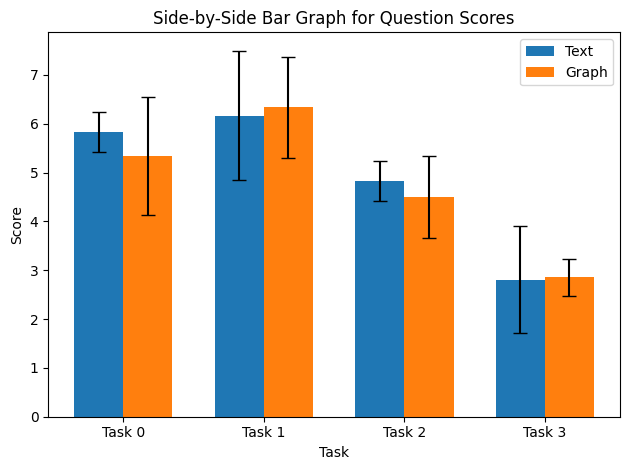

In [22]:
# Create a DataFrame
score_df = pd.DataFrame(score_text_data)

# Plot side-by-side bar graph
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(score_df['task']))

# Bar for text
text_bar = ax.bar([idx - bar_width/2 for idx in index], score_df['score_avg_text'], bar_width, label='Text', yerr=score_df['score_std_text'], capsize=5)

# Bar for graph
graph_bar = ax.bar([idx + bar_width/2 for idx in index], score_df['score_avg_graph'], bar_width, label='Graph', yerr=score_df['score_std_graph'], capsize=5)

# Add labels and title
ax.set_xlabel('Task')
ax.set_ylabel('Score')
ax.set_title('Side-by-Side Bar Graph for Question Scores')
ax.set_xticks(index)
ax.set_xticklabels(score_df['task'])
ax.legend()

plt.tight_layout()

plt.savefig('fig/task_scores.png', format='png')
plt.show()

In [23]:
def get_average_score_percent(df, task_num, type):
    if (type == 'all'):
        return pd.to_numeric(df[f't{task_num}_score_percent']).mean()
    if (type == 'graph'):
        return pd.to_numeric(df.loc[df[f't{task_num}_prov_type'] == 'graph', f't{task_num}_score_percent']).mean()
    if (type == 'text'):
        return pd.to_numeric(df.loc[df[f't{task_num}_prov_type'] == 'text', f't{task_num}_score_percent']).mean()
    
def get_std_score_percent(df, task_num, type):
    if (type == 'all'):
        return pd.to_numeric(df[f't{task_num}_score_percent']).std()
    if (type == 'graph'):
        return pd.to_numeric(df.loc[df[f't{task_num}_prov_type'] == 'graph', f't{task_num}_score_percent']).std()
    if (type == 'text'):
        return pd.to_numeric(df.loc[df[f't{task_num}_prov_type'] == 'text', f't{task_num}_score_percent']).std()

def print_averages_score_percent(average, std, graph_average, graph_std, text_average, text_std):
    print("Average: " + str(taverage) + ", Standard Deviation: " + str(std))
    print("T0 Graph Average: " + str(graph_average) + ", Standard Deviation: " + str(graph_std))
    print("T0 Text Average: " + str(text_average) + ", Standard Deviation: " + str(text_std))

In [24]:
t0_avg_score_percent = get_average_score_percent(df, 0, 'all')
t0_score_percent_avg_graph = get_average_score_percent(df, 0, 'graph')
t0_score_percent_avg_text = get_average_score_percent(df, 0, 'text')

t0_std_score_percent = get_std_score_percent(df, 0, 'all')
t0_score_percent_std_graph = get_std_score_percent(df, 0, 'graph')
t0_score_percent_std_text = get_std_score_percent(df, 0, 'text')

t1_avg_score_percent = get_average_score_percent(df, 1, 'all')
t1_score_percent_avg_graph = get_average_score_percent(df, 1, 'graph')
t1_score_percent_avg_text = get_average_score_percent(df, 1, 'text')

t1_score_percent_std = get_std_score_percent(df, 1, 'all')
t1_score_percent_std_graph = get_std_score_percent(df, 1, 'graph')
t1_score_percent_std_text = get_std_score_percent(df, 1, 'text')

t2_avg_score_percent = get_average_score_percent(df, 2, 'all')
t2_score_percent_avg_graph = get_average_score_percent(df, 2, 'graph')
t2_score_percent_avg_text = get_average_score_percent(df, 2, 'text')

t2_score_percent_std = get_std_score_percent(df, 2, 'all')
t2_score_percent_std_graph = get_std_score_percent(df, 2, 'graph')
t2_score_percent_std_text = get_std_score_percent(df, 2, 'text')

t3_avg_score_percent = get_average_score_percent(df, 3, 'all')
t3_score_percent_avg_graph = get_average_score_percent(df, 3, 'graph')
t3_score_percent_avg_text = get_average_score_percent(df, 3, 'text')

t3_score_percent_std = get_std_score_percent(df, 3, 'all')
t3_score_percent_std_graph = get_std_score_percent(df, 3, 'graph')
t3_score_percent_std_text = get_std_score_percent(df, 3, 'text')

score_percent_text_data = {'task': ['Task 1', 'Task 2', 'Task 3', 'Task 4'], 
                'score_percent_avg_text': [t0_score_percent_avg_text, t1_score_percent_avg_text, t2_score_percent_avg_text, t3_score_percent_avg_text],
                'score_percent_avg_graph': [t0_score_percent_avg_graph, t1_score_percent_avg_graph, t2_score_percent_avg_graph, t3_score_percent_avg_graph],
                'score_percent_std_text': [t0_score_percent_std_text, t1_score_percent_std_text, t2_score_percent_std_text, t3_score_percent_std_text],
                'score_percent_std_graph': [t0_score_percent_std_graph, t1_score_percent_std_graph, t2_score_percent_std_graph, t3_score_percent_std_graph]}

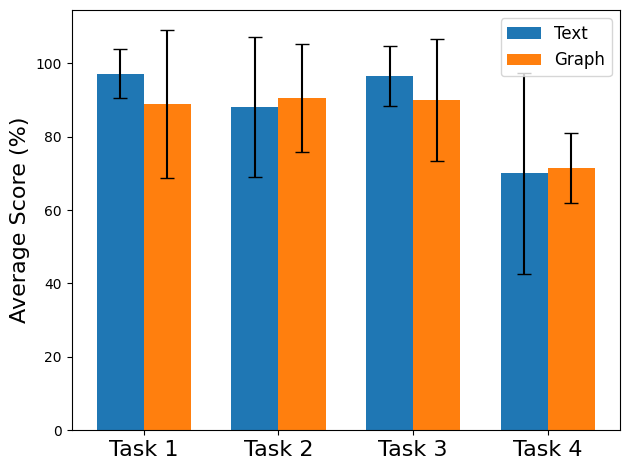

In [25]:
# Create a DataFrame
score_percent_df = pd.DataFrame(score_percent_text_data)

# Plot side-by-side bar graph
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(score_df['task']))

# Bar for text
text_bar = ax.bar([idx - bar_width/2 for idx in index], score_percent_df['score_percent_avg_text'], bar_width, label='Text', yerr=score_percent_df['score_percent_std_text'], capsize=5)

# Bar for graph
graph_bar = ax.bar([idx + bar_width/2 for idx in index], score_percent_df['score_percent_avg_graph'], bar_width, label='Graph', yerr=score_percent_df['score_percent_std_graph'], capsize=5)

# Add labels and title
ax.set_ylabel('Average Score (%)', fontsize=16)
# ax.set_title('Average Question Score Per Task', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(score_percent_text_data['task'], fontsize=16)
ax.legend(fontsize=12)

plt.tight_layout()

plt.savefig('fig/task_scores_percent.png', format='png')
plt.show()

## TLX

In [26]:
def get_average_tlx(df, task_num, type):
    if (type == 'all'):
        return df[f't{task_num}_tlx_score'].mean()
    if (type == 'graph'):
        return df.loc[df['t0_prov_type'] == 'graph', f't{task_num}_tlx_score'].mean()
    if (type == 'text'):
        return df.loc[df['t0_prov_type'] == 'text', f't{task_num}_tlx_score'].mean()
    
def get_std_tlx(timing_df, task_num, type):
    if (type == 'all'):
        return df[f't{task_num}_tlx_score'].std()
    if (type == 'graph'):
        return df.loc[df['t0_prov_type'] == 'graph', f't{task_num}_tlx_score'].std()
    if (type == 'text'):
        return df.loc[df['t0_prov_type'] == 'text', f't{task_num}_tlx_score'].std()

def print_averages_timing(average, std, graph_average, graph_std, text_average, text_std):
    print("T0 Average: " + str(t0_average) + ", Standard Deviation: " + str(t0_std))
    print("T0 Graph Average: " + str(t0_graph_average) + ", Standard Deviation: " + str(t0_graph_std))
    print("T0 Text Average: " + str(t0_text_average) + ", Standard Deviation: " + str(t0_text_std))

In [27]:
t0_tlx_avg = get_average_tlx(df, 0, 'all')
t1_tlx_avg = get_average_tlx(df, 1, 'all')
t2_tlx_avg = get_average_tlx(df, 2, 'all')
t3_tlx_avg = get_average_tlx(df, 3, 'all')

t0_tlx_std = get_std_tlx(df, 0, 'all')
t1_tlx_std = get_std_tlx(df, 1, 'all')
t2_tlx_std = get_std_tlx(df, 2, 'all')
t3_tlx_std = get_std_tlx(df, 3, 'all')

t0_tlx_avg_text = get_average_tlx(df, 0, 'text')
t1_tlx_avg_text = get_average_tlx(df, 1, 'text')
t2_tlx_avg_text = get_average_tlx(df, 2, 'text')
t3_tlx_avg_text = get_average_tlx(df, 3, 'text')

t0_tlx_std_text = get_std_tlx(df, 0, 'text')
t1_tlx_std_text = get_std_tlx(df, 1, 'text')
t2_tlx_std_text = get_std_tlx(df, 2, 'text')
t3_tlx_std_text = get_std_tlx(df, 3, 'text')

t0_tlx_avg_graph = get_average_tlx(df, 0, 'graph')
t1_tlx_avg_graph = get_average_tlx(df, 1, 'graph')
t2_tlx_avg_graph = get_average_tlx(df, 2, 'graph')
t3_tlx_avg_graph = get_average_tlx(df, 3, 'graph')

t0_tlx_std_graph = get_std_tlx(df, 0, 'graph')
t1_tlx_std_graph = get_std_tlx(df, 1, 'graph')
t2_tlx_std_graph = get_std_tlx(df, 2, 'graph')
t3_tlx_std_graph = get_std_tlx(df, 3, 'graph')

tlx_text_data = {'task': ['Task 1', 'Task 2', 'Task 3', 'Task 4'], 
                'tlx_score_avg_text': [t0_tlx_avg_text, t1_tlx_avg_text, t2_tlx_avg_text, t3_tlx_avg_text],
                'tlx_score_avg_graph': [t0_tlx_avg_graph, t1_tlx_avg_graph, t2_tlx_avg_graph, t3_tlx_avg_graph],
                'tlx_score_std_text': [t0_tlx_std_text, t1_tlx_std_text, t2_tlx_std_text, t3_tlx_std_text],
                'tlx_score_std_graph': [t0_tlx_std_graph, t1_tlx_std_graph, t2_tlx_std_graph, t3_tlx_std_graph]}

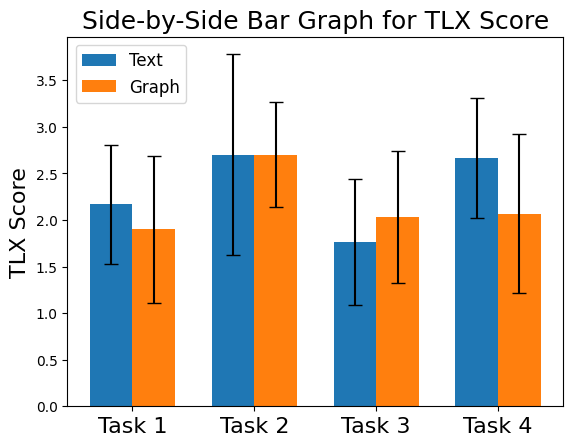

In [28]:
# Create a DataFrame
tlx_df = pd.DataFrame(tlx_text_data)

# Plot side-by-side bar graph
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(tlx_df['task']))

# Bar for text
text_bar = ax.bar([idx - bar_width/2 for idx in index], tlx_df['tlx_score_avg_text'], bar_width, label='Text', yerr=tlx_df['tlx_score_std_text'], capsize=5)

# Bar for graph
graph_bar = ax.bar([idx + bar_width/2 for idx in index], tlx_df['tlx_score_avg_graph'], bar_width, label='Graph', yerr=tlx_df['tlx_score_std_graph'], capsize=5)

# Add labels and title
ax.set_xlabel(None)
ax.set_ylabel('TLX Score', fontsize=16)
ax.set_title('Side-by-Side Bar Graph for TLX Score', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(tlx_df['task'], fontsize=16)
ax.legend(fontsize=12)

plt.savefig('fig/tlx_scores.png', format='png')
plt.show()

In [29]:
def get_average_tlx_norm(df, task_num, type):
    if (type == 'all'):
        return df[f't{task_num}_tlx_avg_normalized'].mean()
    if (type == 'graph'):
        return df.loc[df['t0_prov_type'] == 'graph', f't{task_num}_tlx_avg_normalized'].mean()
    if (type == 'text'):
        return df.loc[df['t0_prov_type'] == 'text', f't{task_num}_tlx_avg_normalized'].mean()
    
def get_std_tlx_norm(timing_df, task_num, type):
    if (type == 'all'):
        return df[f't{task_num}_tlx_avg_normalized'].std()
    if (type == 'graph'):
        return df.loc[df['t0_prov_type'] == 'graph', f't{task_num}_tlx_avg_normalized'].std()
    if (type == 'text'):
        return df.loc[df['t0_prov_type'] == 'text', f't{task_num}_tlx_avg_normalized'].std()

def print_averages_timing_norm(average, std, graph_average, graph_std, text_average, text_std):
    print("T0 Average: " + str(t0_average) + ", Standard Deviation: " + str(t0_std))
    print("T0 Graph Average: " + str(t0_graph_average) + ", Standard Deviation: " + str(t0_graph_std))
    print("T0 Text Average: " + str(t0_text_average) + ", Standard Deviation: " + str(t0_text_std))

In [30]:
t0_tlx_norm_avg = get_average_tlx_norm(df, 0, 'all')
t1_tlx_norm_avg = get_average_tlx_norm(df, 1, 'all')
t2_tlx_norm_avg = get_average_tlx_norm(df, 2, 'all')
t3_tlx_norm_avg = get_average_tlx_norm(df, 3, 'all')

t0_tlx_norm_std = get_std_tlx_norm(df, 0, 'all')
t1_tlx_norm_std = get_std_tlx_norm(df, 1, 'all')
t2_tlx_norm_std = get_std_tlx_norm(df, 2, 'all')
t3_tlx_norm_std = get_std_tlx_norm(df, 3, 'all')

t0_tlx_norm_avg_text = get_average_tlx_norm(df, 0, 'text')
t1_tlx_norm_avg_text = get_average_tlx_norm(df, 1, 'text')
t2_tlx_norm_avg_text = get_average_tlx_norm(df, 2, 'text')
t3_tlx_norm_avg_text = get_average_tlx_norm(df, 3, 'text')

t0_tlx_norm_std_text = get_std_tlx_norm(df, 0, 'text')
t1_tlx_norm_std_text = get_std_tlx_norm(df, 1, 'text')
t2_tlx_norm_std_text = get_std_tlx_norm(df, 2, 'text')
t3_tlx_norm_std_text = get_std_tlx_norm(df, 3, 'text')

t0_tlx_norm_avg_graph = get_average_tlx_norm(df, 0, 'graph')
t1_tlx_norm_avg_graph = get_average_tlx_norm(df, 1, 'graph')
t2_tlx_norm_avg_graph = get_average_tlx_norm(df, 2, 'graph')
t3_tlx_norm_avg_graph = get_average_tlx_norm(df, 3, 'graph')

t0_tlx_norm_std_graph = get_std_tlx_norm(df, 0, 'graph')
t1_tlx_norm_std_graph = get_std_tlx_norm(df, 1, 'graph')
t2_tlx_norm_std_graph = get_std_tlx_norm(df, 2, 'graph')
t3_tlx_norm_std_graph = get_std_tlx_norm(df, 3, 'graph')

tlx_norm_text_data = {'task': ['Task 1', 'Task 2', 'Task 3', 'Task 4'], 
                'tlx_norm_avg_text': [t0_tlx_norm_avg_text, t1_tlx_norm_avg_text, t2_tlx_norm_avg_text, t3_tlx_norm_avg_text],
                'tlx_norm_avg_graph': [t0_tlx_norm_avg_graph, t1_tlx_norm_avg_graph, t2_tlx_norm_avg_graph, t3_tlx_norm_avg_graph],
                'tlx_norm_std_text': [t0_tlx_norm_std_text, t1_tlx_norm_std_text, t2_tlx_norm_std_text, t3_tlx_norm_std_text],
                'tlx_norm_std_graph': [t0_tlx_norm_std_graph, t1_tlx_norm_std_graph, t2_tlx_norm_std_graph, t3_tlx_norm_std_graph]}

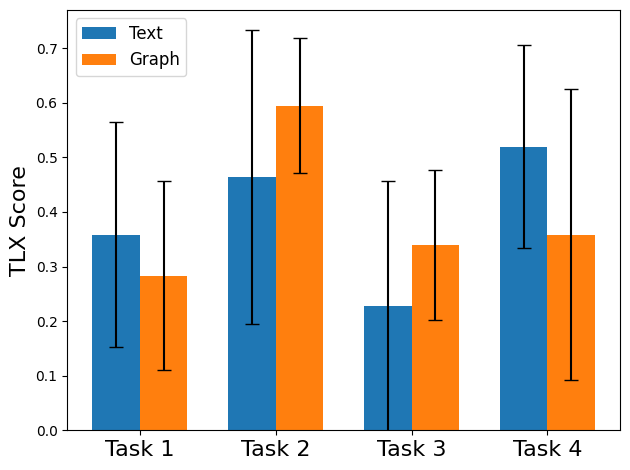

In [31]:
# Create a DataFrame
tlx_norm_df = pd.DataFrame(tlx_norm_text_data)

# Plot side-by-side bar graph
fig1, ax = plt.subplots()

bar_width = 0.35
index = range(len(tlx_norm_df['task']))

# Bar for text
text_bar = ax.bar([idx - bar_width/2 for idx in index], tlx_norm_df['tlx_norm_avg_text'], bar_width, label='Text', yerr=tlx_norm_df['tlx_norm_std_text'], capsize=5)

# Bar for graph
graph_bar = ax.bar([idx + bar_width/2 for idx in index], tlx_norm_df['tlx_norm_avg_graph'], bar_width, label='Graph', yerr=tlx_norm_df['tlx_norm_std_graph'], capsize=5)

# Add labels and title
ax.set_xlabel(None)
ax.set_ylabel('TLX Score', fontsize=16)
ax.set_ylim(bottom=0)
#ax.set_title('Normalized Self-Assigned Cognitive Load Score', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(tlx_norm_df['task'], fontsize=16)
ax.legend(fontsize=12)

plt.tight_layout()

plt.savefig('fig/tlx_norm.png', format='png')
plt.show()

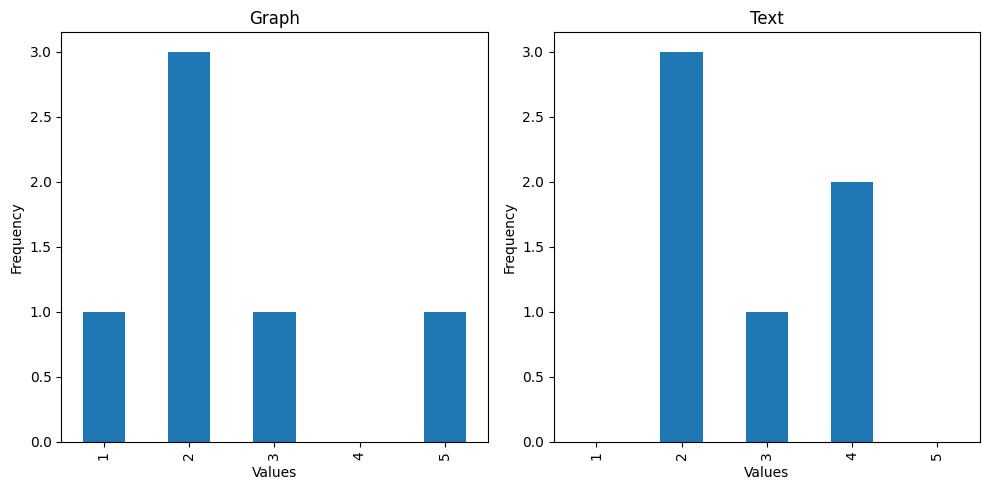

In [32]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns for side-by-side charts

x_values = [1, 2, 3, 4, 5]

category_a_data = df[df['t0_prov_type'] == 'graph']
category_a_data['t0_tlx_0'].value_counts().reindex(x_values, fill_value=0).sort_index().plot(kind='bar', ax=axs[0])
axs[0].set_title('Graph')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

# Create the bar chart for Category B
category_b_data = df[df['t0_prov_type'] == 'text']
category_b_data['t0_tlx_0'].value_counts().reindex(x_values, fill_value=0).sort_index().plot(kind='bar', ax=axs[1])
axs[1].set_title('Text')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

0     5
1     1
2     2
6     5
10    2
11    4
Name: t1_tlx_0, dtype: int64


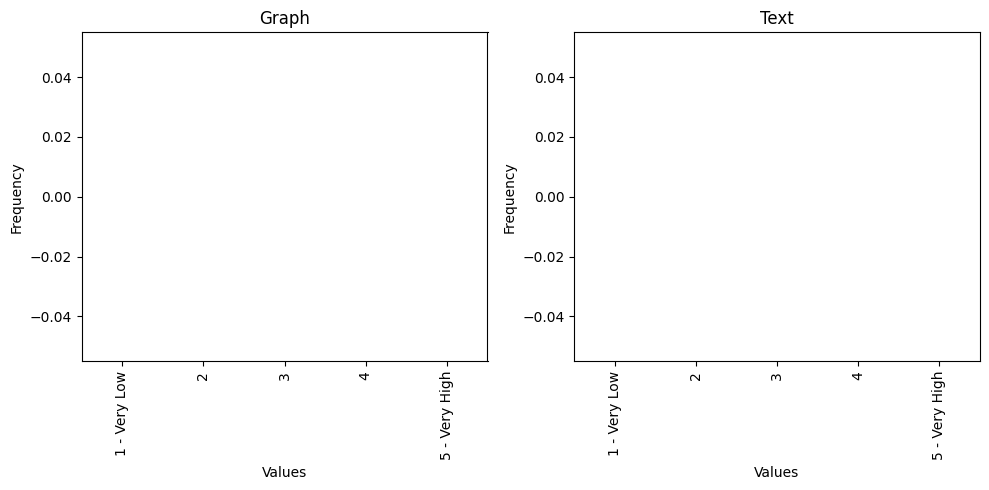

In [33]:
# How mentally demanding was this task?

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns for side-by-side charts

x_values = ['1 - Very Low', '2', '3', '4', '5 - Very High']

category_a_data = df[df['t1_prov_type'] == 'graph']
print(category_a_data['t1_tlx_0'])
category_a_data['t1_tlx_0'].value_counts().reindex(x_values, fill_value=0).sort_index().plot(kind='bar', ax=axs[0])
axs[0].set_title('Graph')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

# Create the bar chart for Category B
category_b_data = df[df['t1_prov_type'] == 'text']
category_b_data['t1_tlx_0'].value_counts().reindex(x_values, fill_value=0).sort_index().plot(kind='bar', ax=axs[1])
axs[1].set_title('Text')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

#plt.yticks(range(int(value_counts.max()) + 1))

# Adjust layout
plt.tight_layout()

## Post

In [34]:
# Define a mapping dictionary
mapping_dict = {1: 'Graph', 2: 'Mostly Graph', 3: 'Equal', 4: 'Mostly Text', 5: 'Text'}

# Map values in the 'Category' column to new values based on the mapping dictionary
df['post_0_1_mapped'] = df['post_0_1'].map(mapping_dict)
df['post_1_1_mapped'] = df['post_1_1'].map(mapping_dict)

df['post_0_1']
df['post_0_1_mapped']

0             Text
1      Mostly Text
2      Mostly Text
3            Graph
4     Mostly Graph
5      Mostly Text
6      Mostly Text
7            Equal
8     Mostly Graph
9     Mostly Graph
10           Equal
11            Text
Name: post_0_1_mapped, dtype: object

post_0_1_mapped
Text            2
Mostly Text     4
Equal           2
Mostly Graph    3
Graph           1
Name: count, dtype: int64


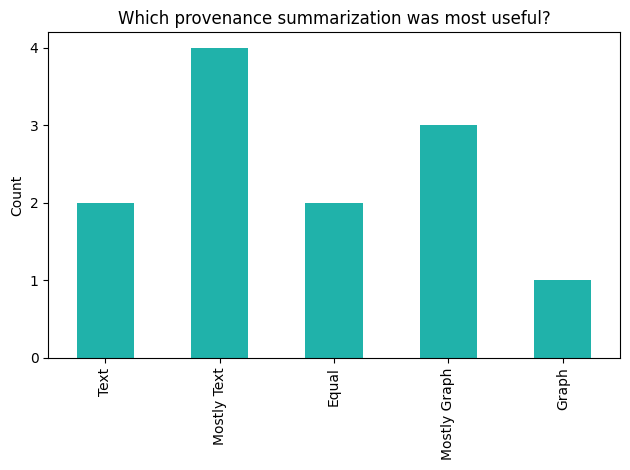

In [35]:
# Summary Preference
# Count the occurrences of each unique text value

x_values = ['Text', 'Mostly Text', 'Equal', 'Mostly Graph', 'Graph']

value_counts = df['post_0_1_mapped'].value_counts().reindex(x_values, fill_value=0)
print(value_counts)

# Plotting a bar graph based on the counts
value_counts.plot(kind='bar', color='lightseagreen')

# Adding labels and title
plt.xlabel(None)
plt.ylabel('Count')
plt.title('Which provenance summarization was most useful?')
plt.yticks(range(int(value_counts.max()) + 1))

plt.tight_layout()

plt.savefig('fig/useful_bar.png', format='png')

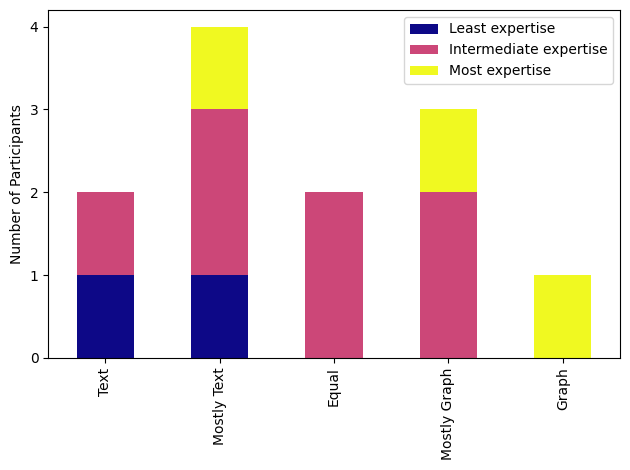

In [36]:
# Group by 'experience' and 'preference', and then unstack to pivot the data
grouped_df = df.groupby(['post_0_1_mapped', 'experience score']).size().unstack(fill_value=0).reindex(x_values, fill_value=0)

# Plot the stacked bar chart
ax = grouped_df.plot(kind='bar', stacked=True, colormap='plasma')

# Set legend labels
legend_labels = {
    0: 'Least expertise',
    1: 'Intermediate expertise',
    2: 'Most expertise'
}

# Get the handles and labels from the current axes
handles, labels = plt.gca().get_legend_handles_labels()

# Create a new set of handles and labels with the desired legend labels
new_labels = [legend_labels[int(label)] for label in labels]

# Set the legend with the new handles and labels
plt.legend(handles, new_labels)

# Add labels and title
plt.xlabel(None)
plt.ylabel('Number of Participants')
#plt.title('Which provenance summarization was most useful?')
plt.yticks(range(int(value_counts.max()) + 1))

plt.tight_layout()

plt.savefig('fig/useful_bar_stacked.png', format='png')
plt.savefig('fig/useful_bar_stacked.svg', format='svg')

post_1_1_mapped
Text            2
Mostly Text     1
Equal           1
Mostly Graph    6
Graph           2
Name: count, dtype: int64


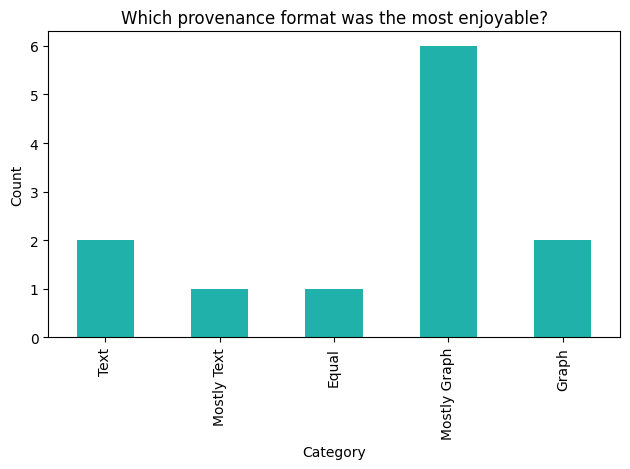

In [37]:
# Summary Preference
x_values = ['Text', 'Mostly Text', 'Equal', 'Mostly Graph', 'Graph']

df_subset = df.iloc[2:]
value_counts = df['post_1_1_mapped'].value_counts().reindex(x_values, fill_value=0)
print(value_counts)

# Plotting a bar graph based on the counts
value_counts.plot(kind='bar', color='lightseagreen')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Which provenance format was the most enjoyable?')
plt.yticks(range(int(value_counts.max()) + 1))

plt.tight_layout()

plt.savefig('fig/enjoy_bar.png', format='png')

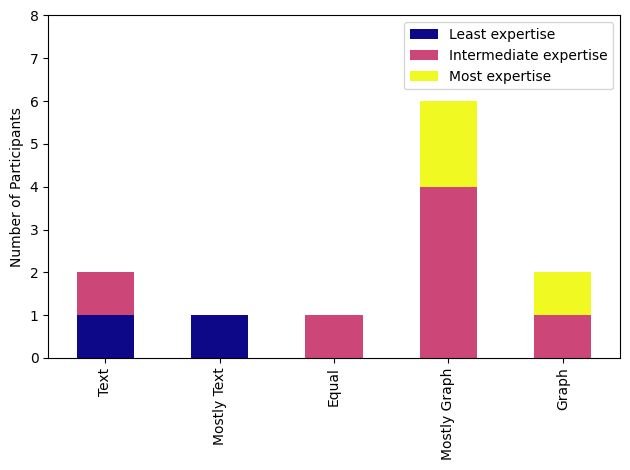

In [38]:
# Group by 'experience' and 'preference', and then unstack to pivot the data
grouped_df = df.groupby(['post_1_1_mapped', 'experience score']).size().unstack(fill_value=0).reindex(x_values, fill_value=0)

# Plot the stacked bar chart
ax = grouped_df.plot(kind='bar', stacked=True, colormap='plasma')

# Set legend labels
legend_labels = {
    0: 'Least expertise',
    1: 'Intermediate expertise',
    2: 'Most expertise'
}

# Get the handles and labels from the current axes
handles, labels = plt.gca().get_legend_handles_labels()

# Create a new set of handles and labels with the desired legend labels
new_labels = [legend_labels[int(label)] for label in labels]

# Set the legend with the new handles and labels
plt.legend(handles, new_labels)

# Add labels and title
plt.xlabel(None)
plt.ylabel('Number of Participants')
#plt.title('Which provenance summarization was most enjoyable?')
plt.yticks(range(int(value_counts.max()) + 3))

plt.tight_layout()

plt.savefig('fig/enjoy_bar_stacked.png', format='png')
plt.savefig('fig/enjoy_bar_stacked.svg', format='svg')